# Alpha-Beta-Pruning

In [1]:
import graphviz as gv
from IPython.display import Image, display

 ## Tests

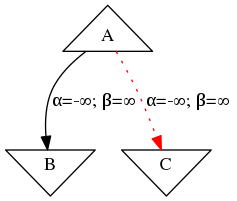

In [13]:
g2 = gv.Digraph(format='png')
# maximizer nodes
g2.attr('node', shape='triangle')
g2.node('max-1', label='A')
# minimizer nodes
g2.attr('node', shape='invtriangle')
g2.node('min-2', label='B')
# add edges
g2.edge('max-1', 'min-2', label='&alpha;=-&infin;; &beta;=&infin;')
g2.node('min-3', label='C')
g2.attr('edge', color='red', style='dotted')
g2.edge('max-1', 'min-3', label='&alpha;=-&infin;; &beta;=&infin;')


# out
g2.render(filename='img/g2')
display(Image(filename='img/g2.png'))


# Production

In [3]:
%load_ext autoreload
%autoreload 2

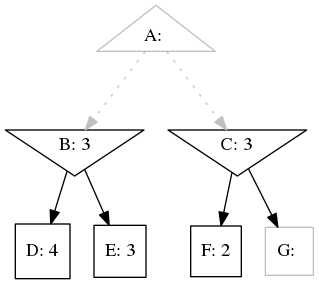

In [26]:
from algorithm import *

graph = {
    'A': ['B', 'C'],  # 1. Layer
    'B': ['D', 'E'],  # 2. Layer
    'C': ['F', 'G'],
    'D': 4,  # 3. Layer
    'E': 3,
    'F': 2,
    'G': 1,
}

desc = alpha_beta(graph)
digraph = build(graph, desc)
digraph.render(filename='img/graph')
display(Image(filename='img/graph.png'))
